In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Multi-class Classification

### 1.1 Dataset

In [12]:
from scipy.io import loadmat

data = loadmat('ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

## 1.2 visualization data

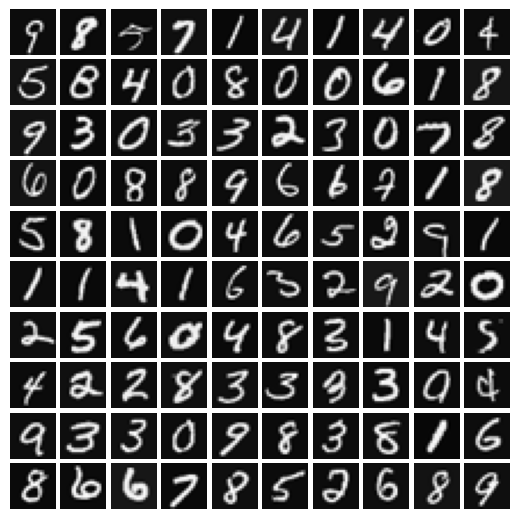

In [14]:
import numpy as np
import matplotlib.pyplot as plt

rows = 10
cols = 10
fig, axes = plt.subplots(rows, cols, figsize=(5, 5))

indexes = np.random.choice(5000, rows * cols)

for ax, index in zip(axes.flat, indexes):
    ax.imshow(data['X'][index].reshape(20, 20).T, cmap='gray')
    ax.set_axis_off()

plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

# 1.3 Vectorization in logistic regression 

In [15]:
import numpy as np
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

In [16]:
def lr_cost_function(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta = theta[:, np.newaxis] 
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h))) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X) + ((lambda_reg/m) * theta.T)
    grad[0, 0] = (1/m) * diff_hy.T.dot(X[:, 0])

    return J, grad

In [20]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.hstack((np.ones((5,1)), (np.arange(1,16).reshape(3,5)).T / 10))
y_t = np.array([1, 0, 1, 0, 1]).reshape(5, -1)
lambda_t = 3

In [22]:
J, grad = lr_cost_function(theta_t, X_t, y_t, lambda_t)
print('Cost:', J)



Cost: [[2.5348194]]


In [26]:
print('Grad', grad)

Grad [[ 0.14656137 -0.54855841  0.72472227  1.39800296]]


# one vs all classification 

In [36]:
import scipy.optimize as opt

def one_vs_all(X, y, num_labels, lambda_reg):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n+1))
    X = np.hstack((np.ones((m, 1)), X))

    for i in range(num_labels):
        initial_theta = np.zeros(n+1)
        opt_results = opt.minimize(lr_cost_function, initial_theta, args=(X, y==(i+1), lambda_reg),
                                   method='TNC', jac=True)
        all_theta[i, :] = opt_results.x

    return all_theta


In [37]:
def predict_one_vs_all(all_theta, X):
    m, n = X.shape
    X = np.hstack((np.ones((m,1)),X))
    
    pred = sigmoid(X.dot(all_theta.T))
    y_pred = np.argmax(pred, axis=1)+1
    return y_pred

In [38]:
lambda_r = 0.1
num_labels = 10
all_theta = one_vs_all(data['X'],data['y'], num_labels, lambda_r)

In [42]:
y_pred = predict_one_vs_all(all_theta, data['X'])
accuracy = np.mean(y_pred == data['y'].T)
f'Train accuracy: {accuracy * 100}'

'Train accuracy: 96.46000000000001'